In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [3]:
import ssl
## Disabling the SSL temporarily due the SSL certificate error while downloading the MNIST dataset. 
## However, it is not recommended.
ssl._create_default_https_context = ssl._create_unverified_context

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
## Enabling the SSL again just in case we proceed with any more downloading from other sources.
ssl._create_default_https_context = ssl.create_default_context

In [6]:
## Normalizing the datasets ranging from 0 to 1 for faster convergence
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [7]:
## Reshaping the data by adding channel value for CNN.
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [8]:
## Converting the ground truth labels to categorical values.
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [9]:
## Creating a sequential model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
## Compiling the model.
model.compile(optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy'])

In [11]:
## Training the model with 5 epochs
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8818 - loss: 0.4123 - val_accuracy: 0.9746 - val_loss: 0.0871
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9786 - loss: 0.0728 - val_accuracy: 0.9787 - val_loss: 0.0690
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9874 - loss: 0.0414 - val_accuracy: 0.9802 - val_loss: 0.0689
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9900 - loss: 0.0315 - val_accuracy: 0.9812 - val_loss: 0.0674
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9938 - loss: 0.0196 - val_accuracy: 0.9840 - val_loss: 0.0544


In [12]:
## Testing the model for accuracy and loss.
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step - accuracy: 0.9772 - loss: 0.0700


In [13]:
print(f'Test accuracy: {test_acc:.4f} /n Test loss: {test_loss:.4f}')

Test accuracy: 0.9817 /n Test loss: 0.0588


In [14]:
import cv2 as cv
import numpy as np

In [15]:
import matplotlib.pyplot as plt

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted label: 0


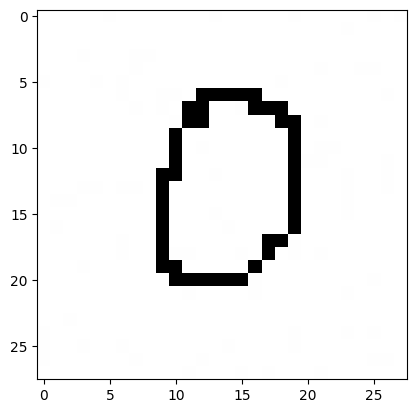

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Predicted label: 8


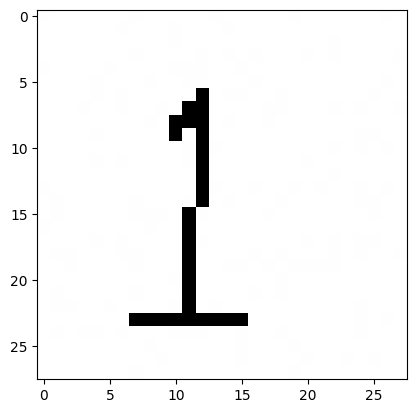

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Predicted label: 2


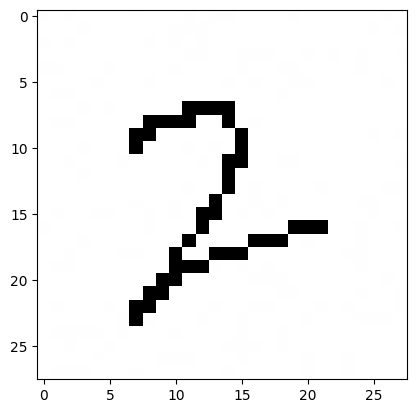

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Predicted label: 3


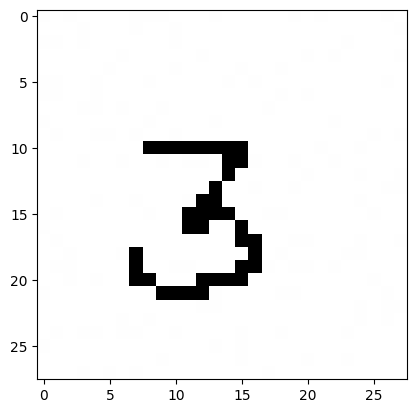

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Predicted label: 4


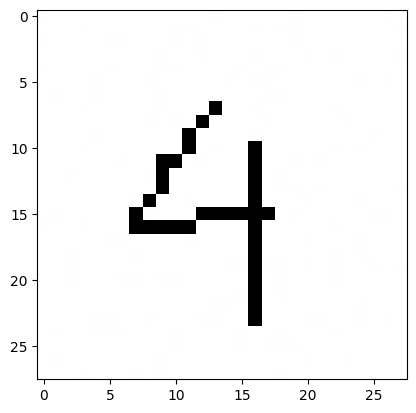

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Predicted label: 5


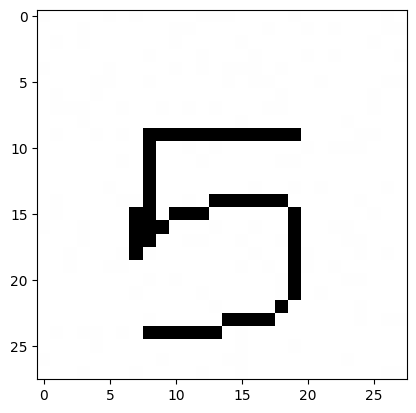

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Predicted label: 6


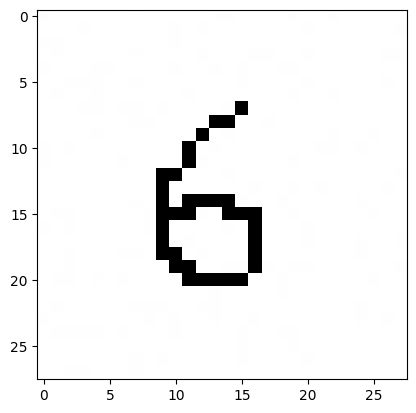

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Predicted label: 7


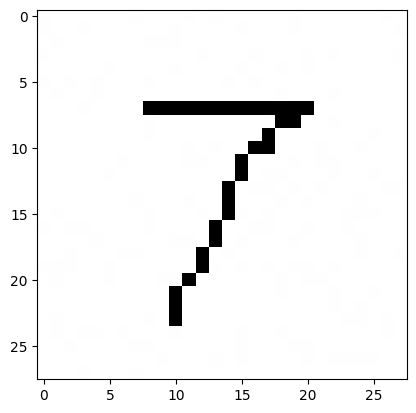

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Predicted label: 8


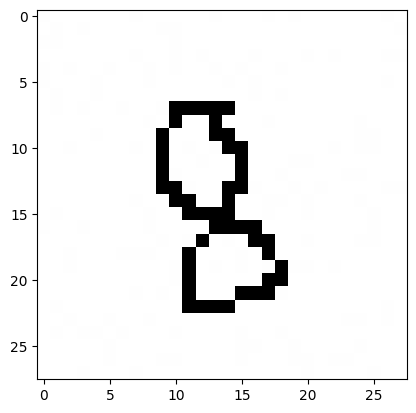

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Predicted label: 9


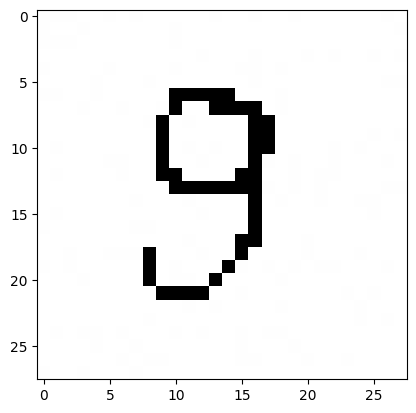

In [16]:
## Importing the images with numbers from local folder and testing the model.
for x in range(0,10):
    img = cv.imread(f'./Digits/{x}.png')[:,:,1]
    img = np.invert(np.array([img]))
    prediction = model.predict(img)
    print(f'Predicted label: {np.argmax(prediction)}')
    plt.imshow(img[0], cmap=plt.cm.binary)
    plt.show()